In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine

In [51]:
df=pd.read_csv('tabular/tracks.csv', skipinitialspace=True)

In [52]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... features_duration_ms  \
0                                 1989  ...               290479   
1                              Kiasmos  ...               539229   
2                        Night Visions  ...               264200   
3                   Confronted Remixes  ...               387414   
4                    10 Years Diynamic  ...               248957   
...                                ...  ...                  ...   
109542  I'm Good (Blue) [REAPER Remix]  ...               209655   
109543                End Of The Night  ...               205724   
109544                   One More Love  ...               195853   
109545                        Savannah  ...               208698   
109546                  Champagne Talk  ...               202826   

       time_signature  start_of_fade_out  tempo_confidence  \
0                   3          275.90530             0.020   
1                   4          517.28253             0.678   
2                   3          259.04180             0.847   
3                   4          387.41360             0.882   
4                   4          239.63574             0.882   
...               ...                ...               ...   
109542              4          200.10376             0.729   
109543              4          200.98611             0.712   
109544              4          189.48643             0.814   
109545              4          197.41605             0.650   
109546              4          196.73688             0.428   

   

In [53]:
len(df)

109547

In [54]:
df=df.drop_duplicates()

In [55]:
len(df)

109149

In [56]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [57]:
len(df['genre'].unique())

114

In [58]:
list(df['genre'].unique())

['minimal-techno',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'sleep',
 'songwriter',
 'soul',
 'spanish',
 'study',
 'swedish',
 'synth-pop',
 'tango',
 'techno',
 'trance',
 'trip-hop',
 'turkish',
 'world-music',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'acoustic',
 'afrobeat',
 'alt-rock',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'mandopop',
 'metal',
 'metalcore',
 'pop-film',
 'pop',
 'power-pop',
 'progressive-house',
 'psych-rock',
 'punk-rock',
 'punk',
 'r-n-b',
 'reggae',
 'reggaeton',
 'rock-n-roll',
 'rock',
 'rockabilly',
 'romance',
 'sad',
 'salsa',
 'samba',
 'sertanejo',
 'show-tunes',


In [59]:
df.dtypes

id                               object
name                             object
disc_number                       int64
duration_ms                       int64
explicit                           bool
popularity                        int64
track_number                      int64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks                int64
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
features_duration_ms              int64


In [60]:
cosine_similarity_result = 1 - cosine(df_copia_1['duration_ms'], df_copia_1['features_duration_ms'])

In [61]:
cosine_similarity_result

0.9999901264636738

In [62]:
cosine_similarity_result_2 = 1 - cosine(df_copia_1['n_bars'], df_copia_1['n_beats'])

In [63]:
cosine_similarity_result_2

0.9960159868597221

### Eliminazione delle colonne simili

In [64]:
df=df.drop('features_duration_ms', axis=1)
df=df.drop('n_beats', axis=1)

In [65]:
df.columns

Index(['id', 'name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_bars', 'genre'],
      dtype='object')

## Valori nulli

In [66]:
print(df.isnull().any())

id                              False
name                            False
disc_number                     False
duration_ms                     False
explicit                        False
popularity                      False
track_number                    False
artists                         False
album_type                      False
album_name                      False
album_release_date              False
album_release_date_precision    False
album_total_tracks              False
danceability                    False
energy                          False
key                             False
loudness                        False
mode                            False
speechiness                     False
acousticness                    False
instrumentalness                False
liveness                        False
valence                         False
tempo                           False
time_signature                  False
start_of_fade_out               False
tempo_confid

## Scatter plot

In [12]:
df_continui=df[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness','speechiness', 'acousticness',  
                    'instrumentalness', 'liveness', 'valence', 'tempo','start_of_fade_out', 'tempo_confidence', 
                     'time_signature_confidence', 'key_confidence', 'mode_confidence', 'n_beats' ]]

In [13]:
df_continui.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats'],
      dtype='object')

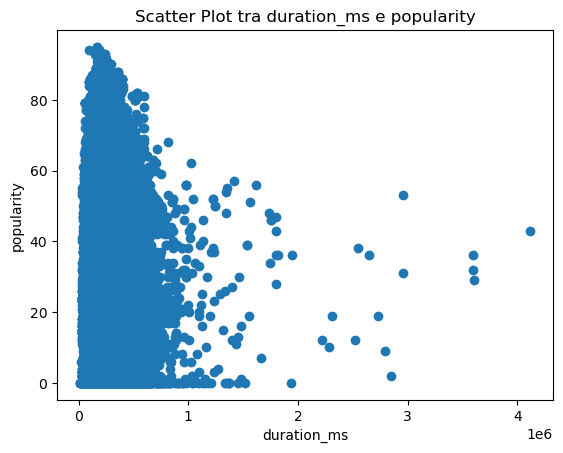

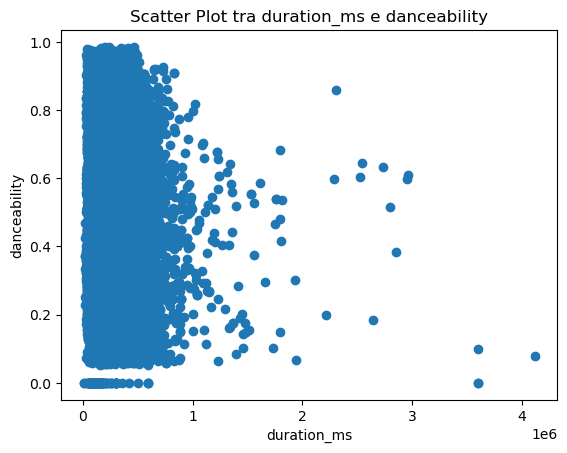

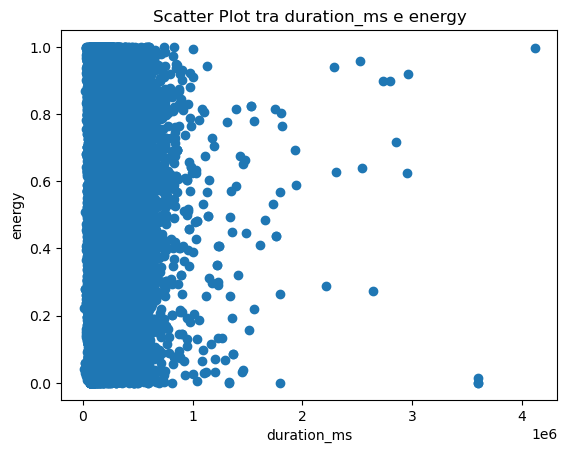

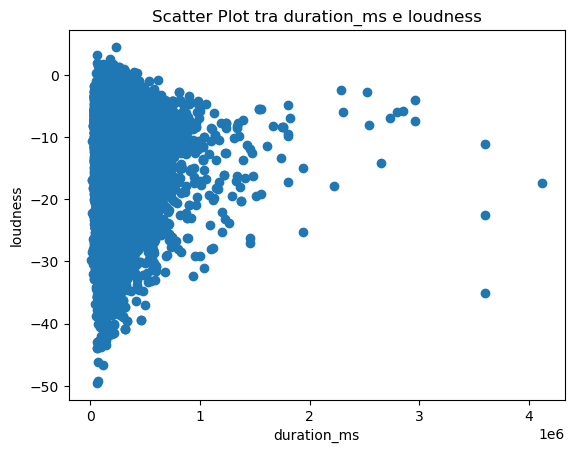

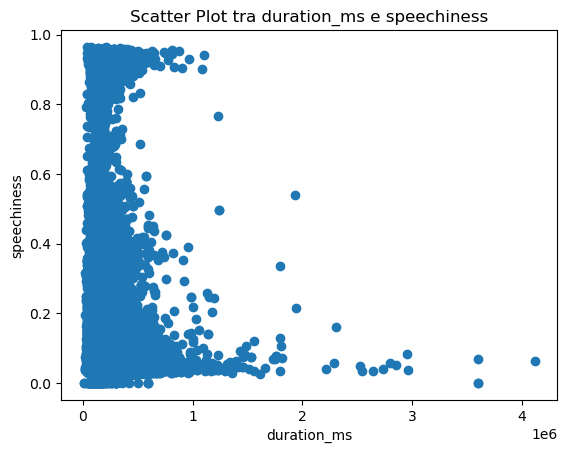

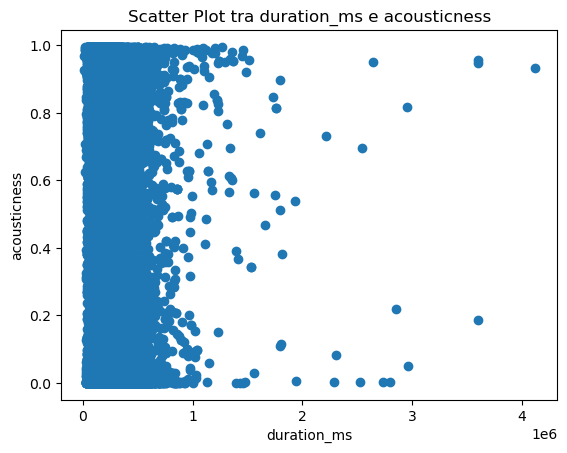

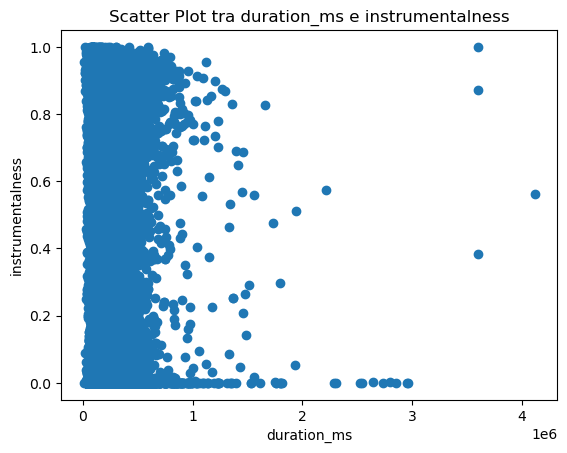

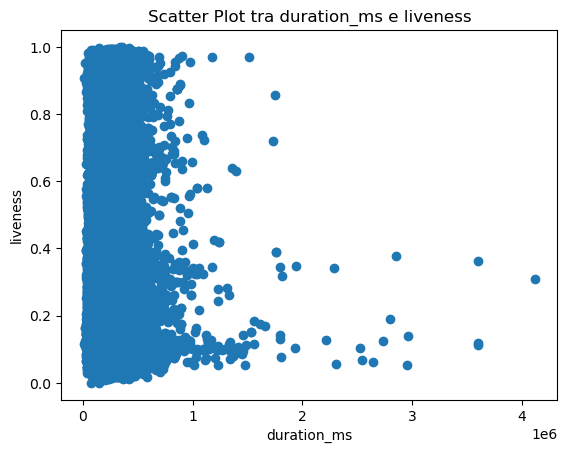

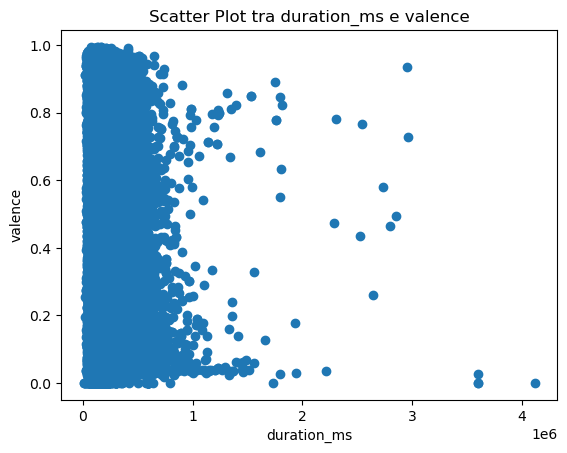

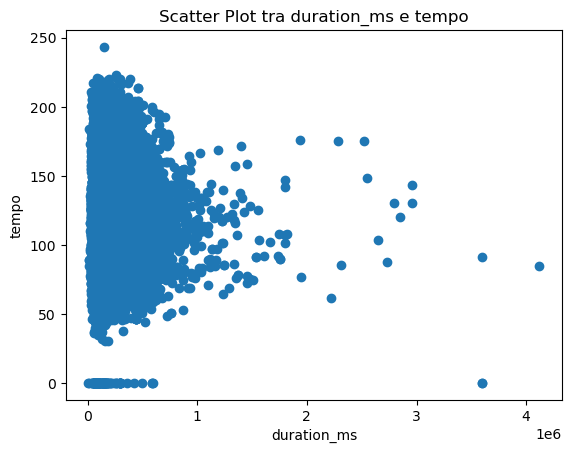

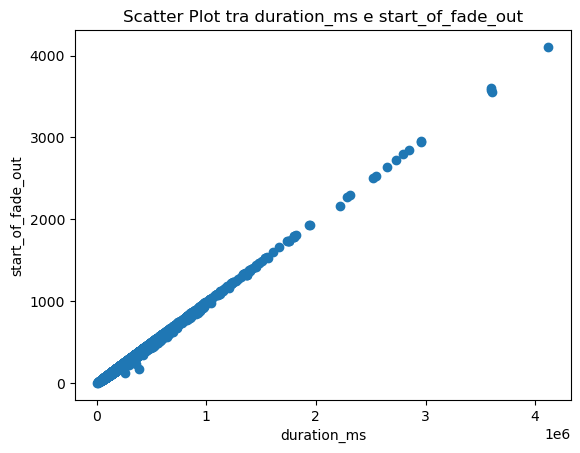

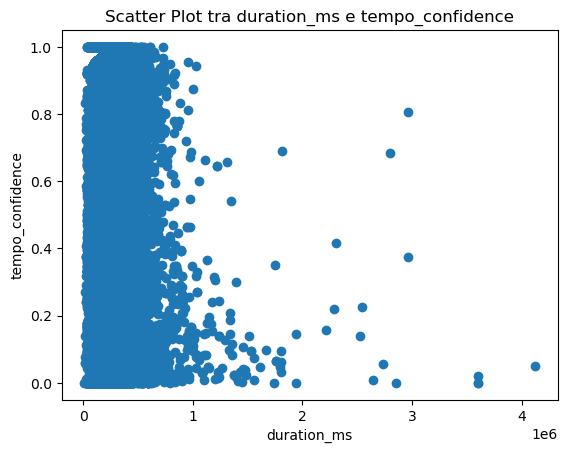

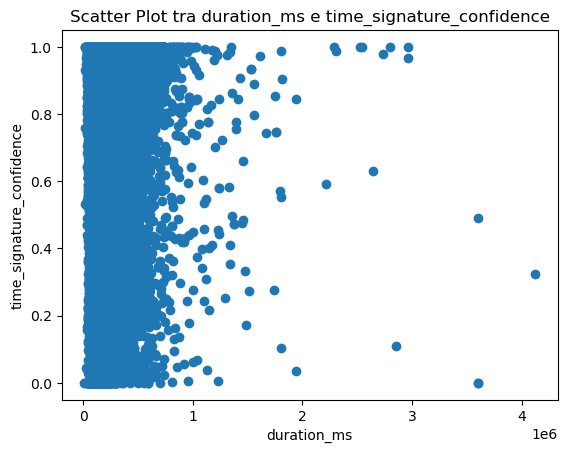

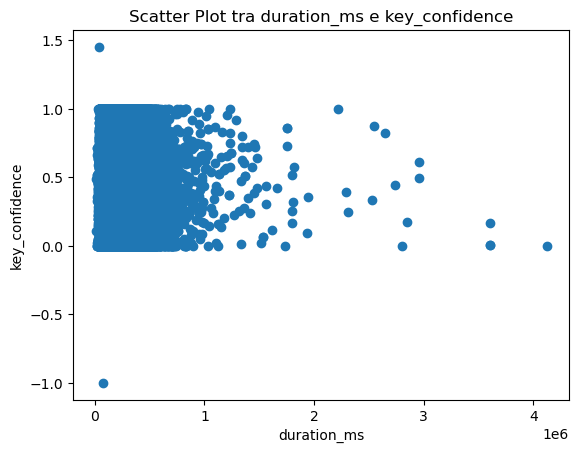

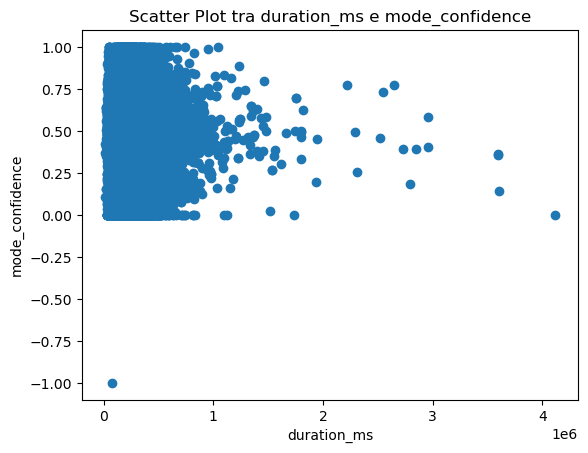

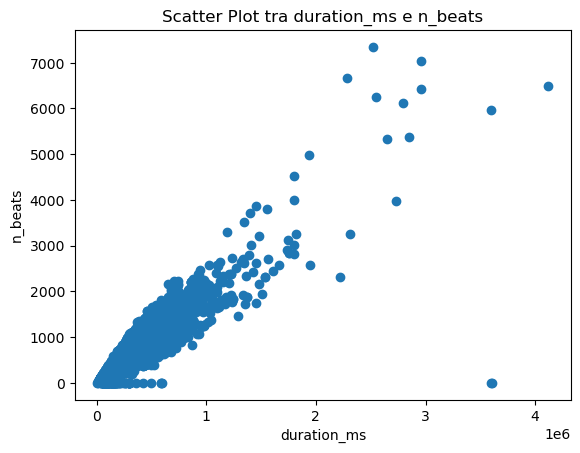

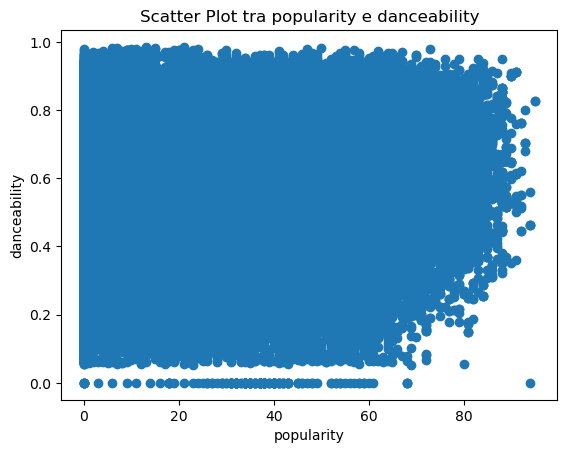

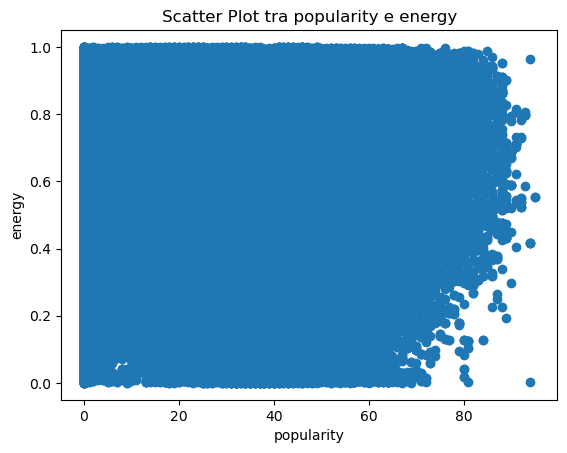

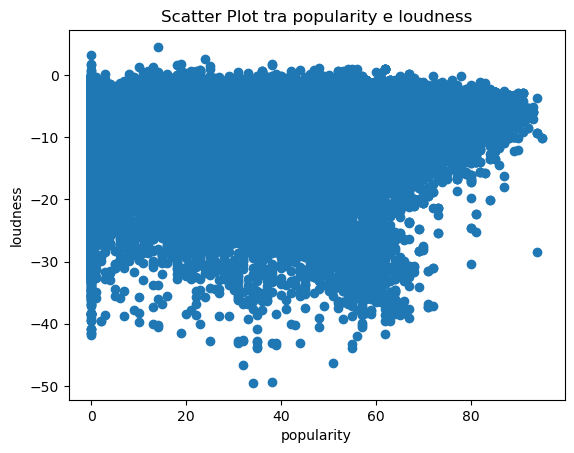

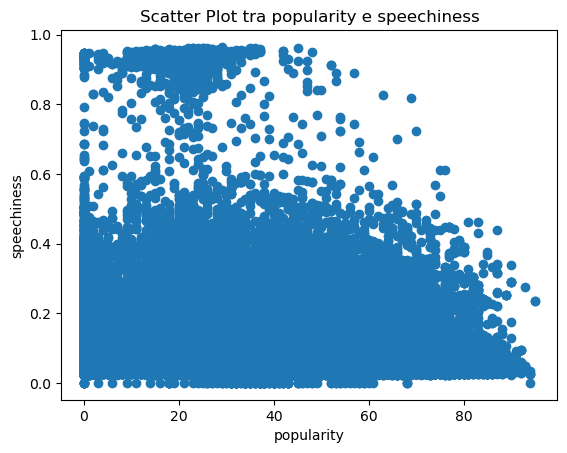

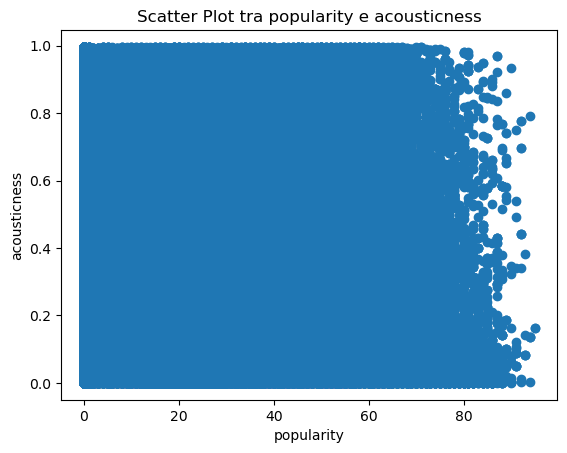

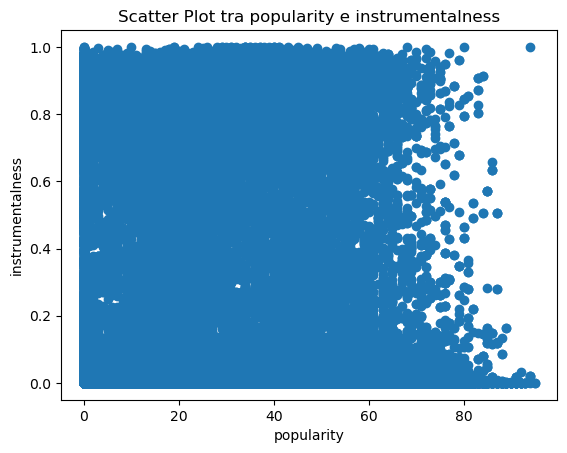

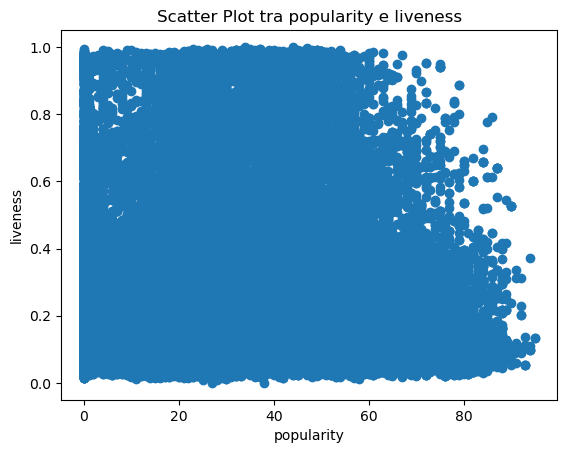

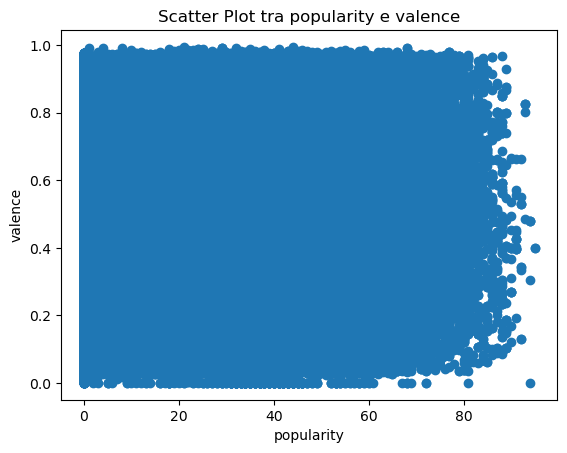

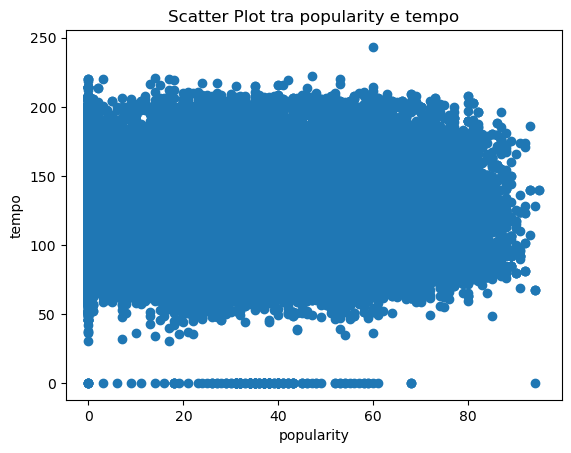

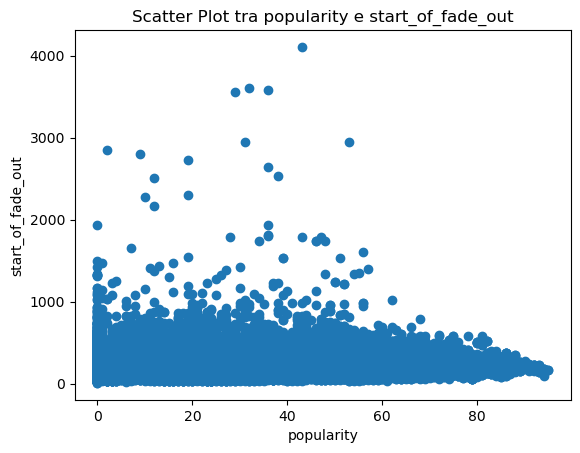

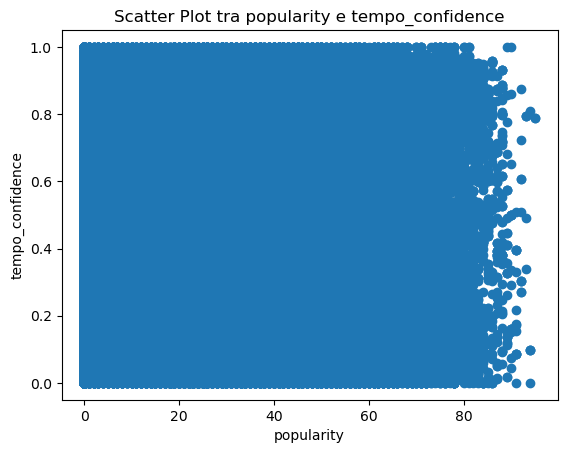

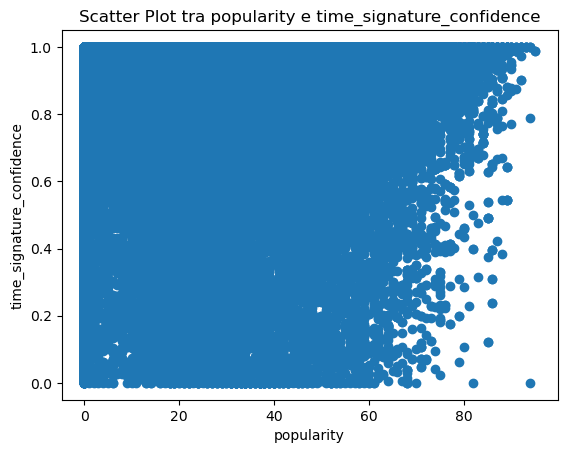

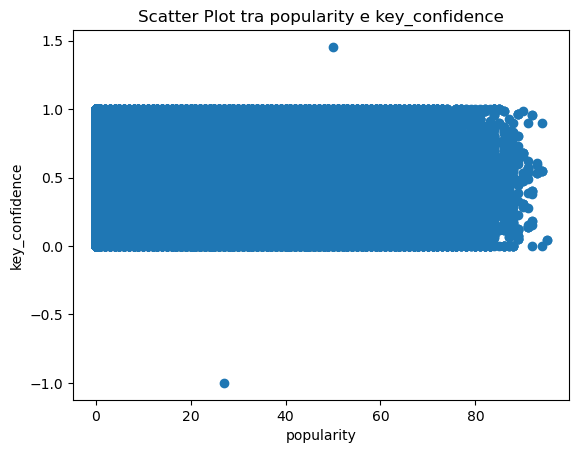

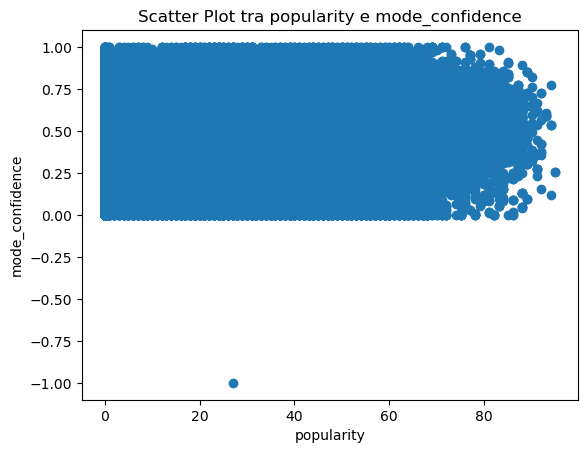

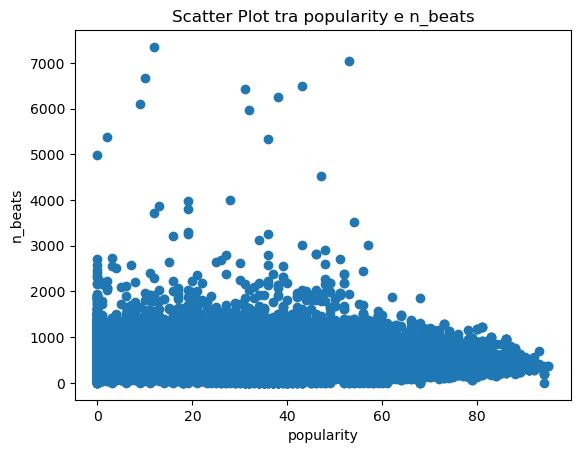

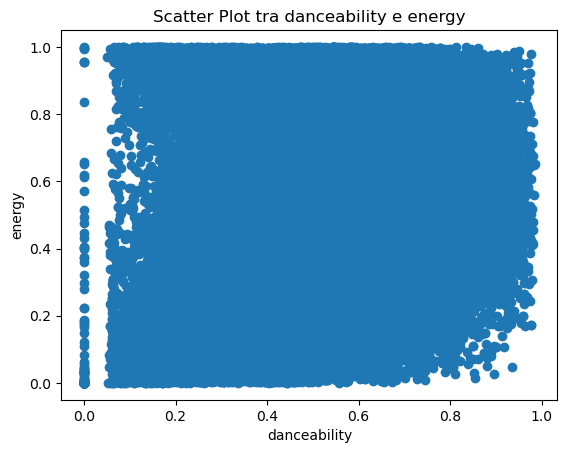

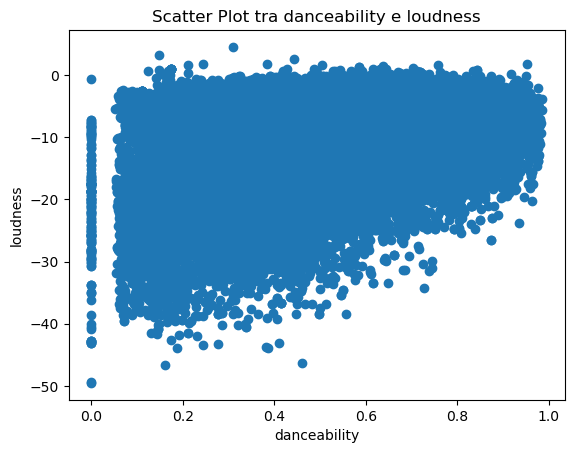

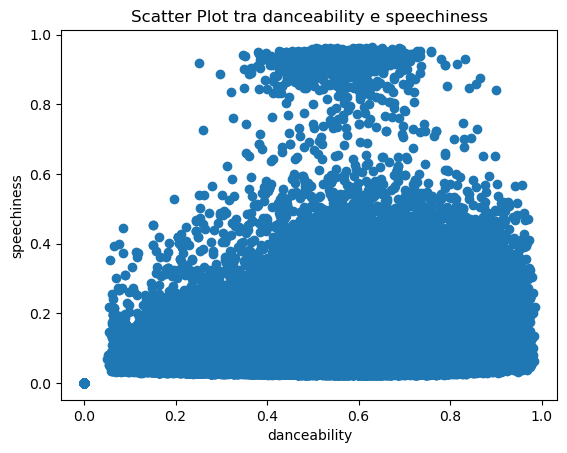

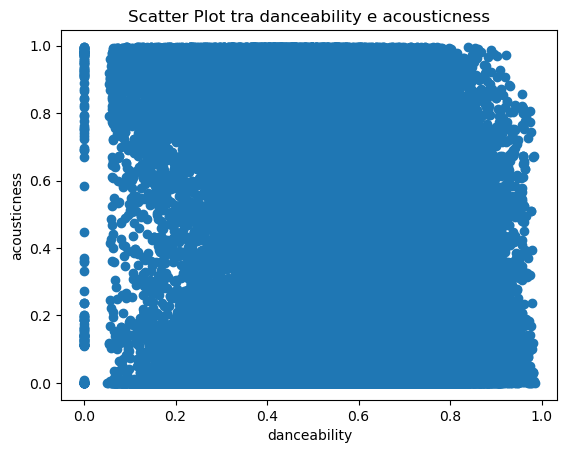

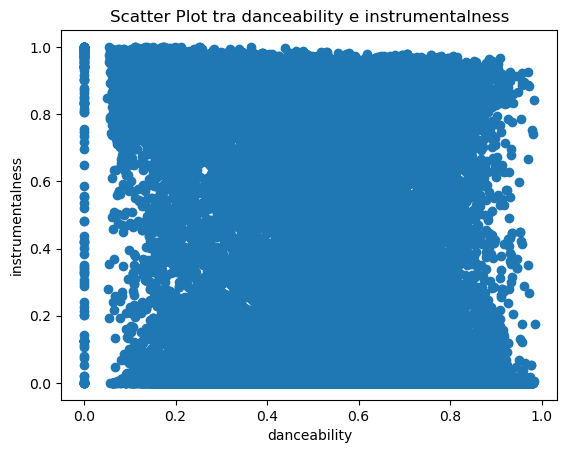

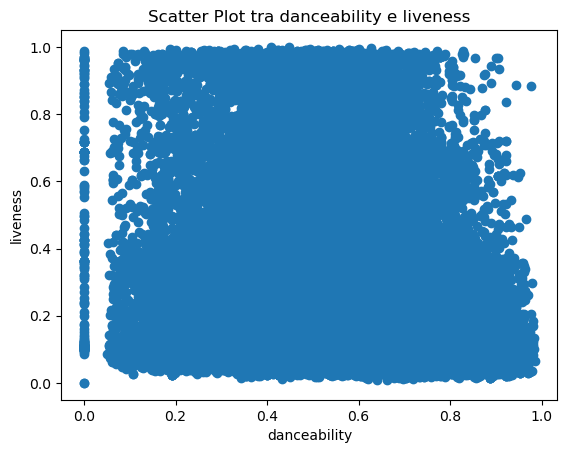

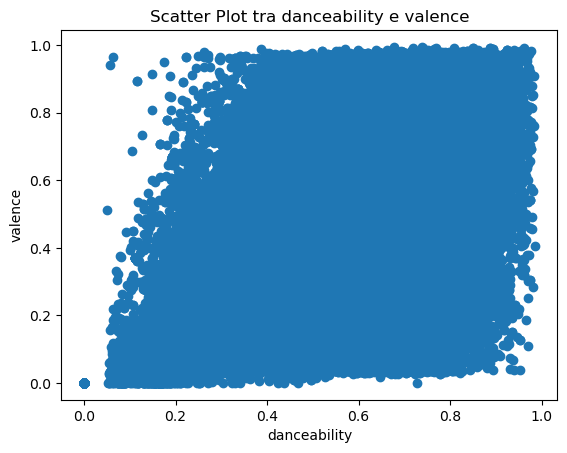

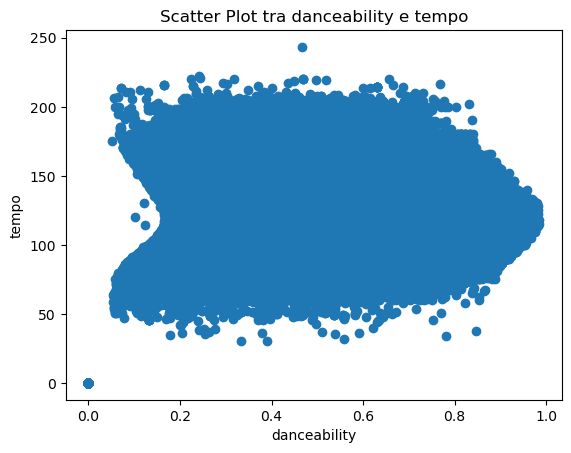

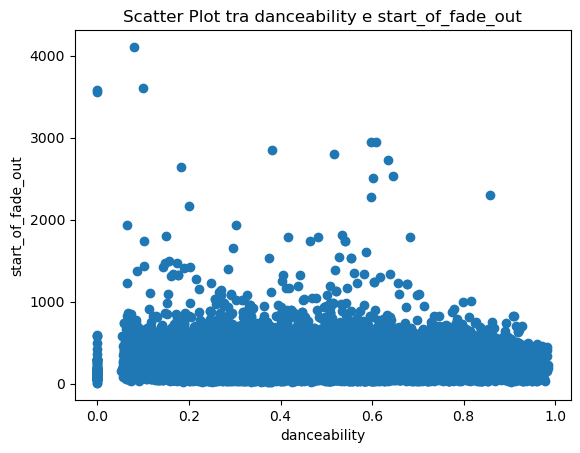

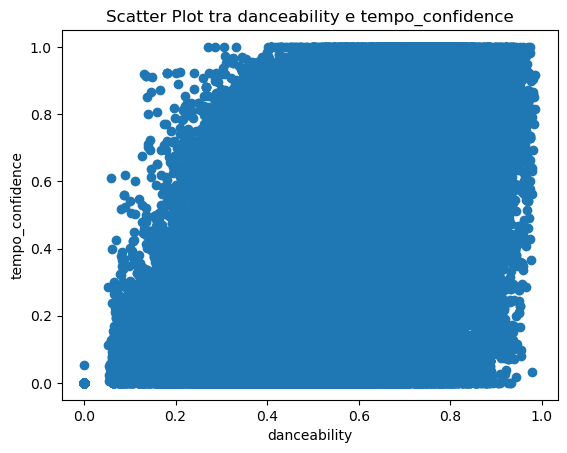

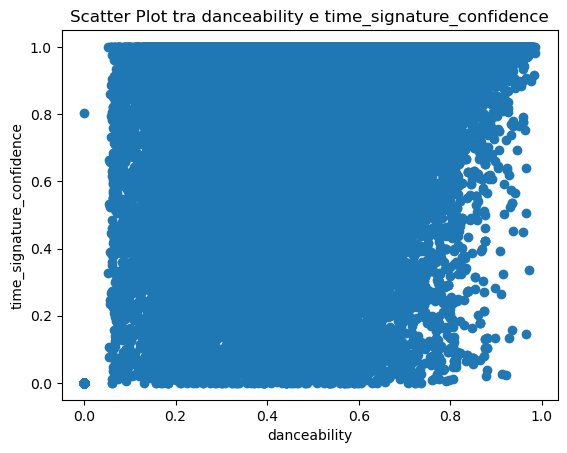

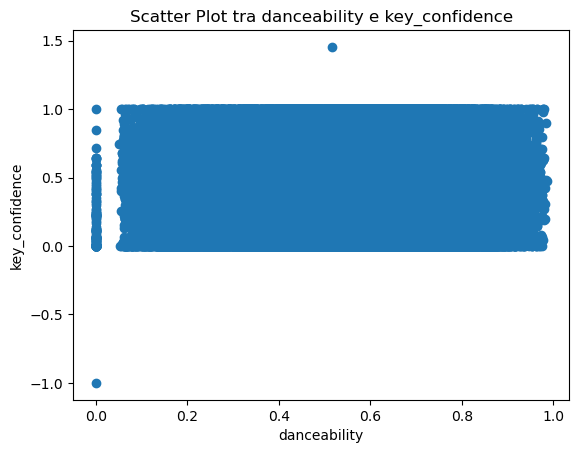

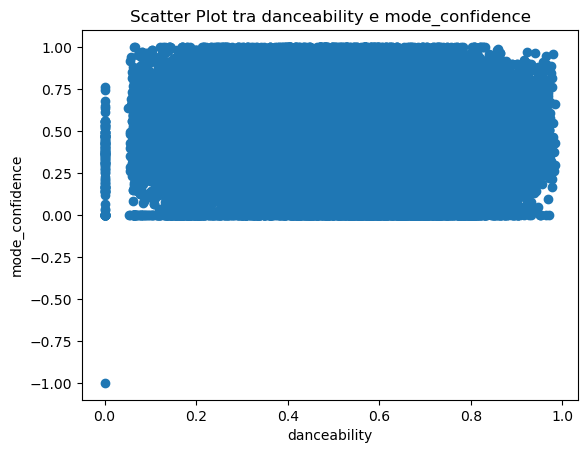

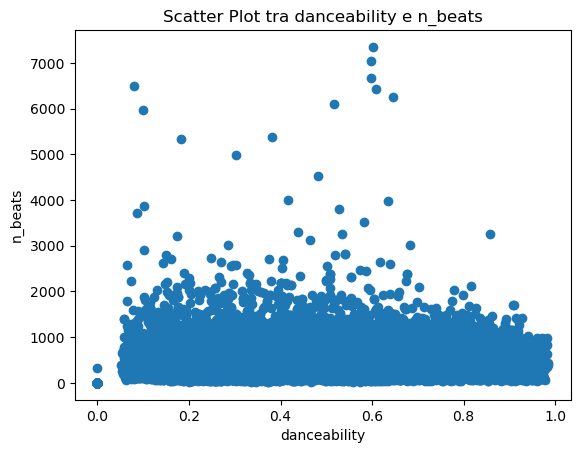

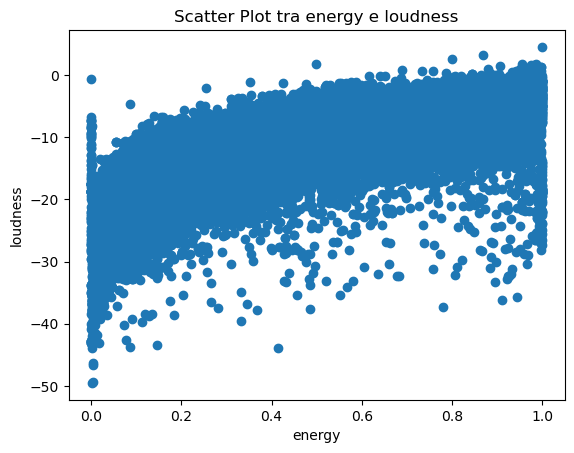

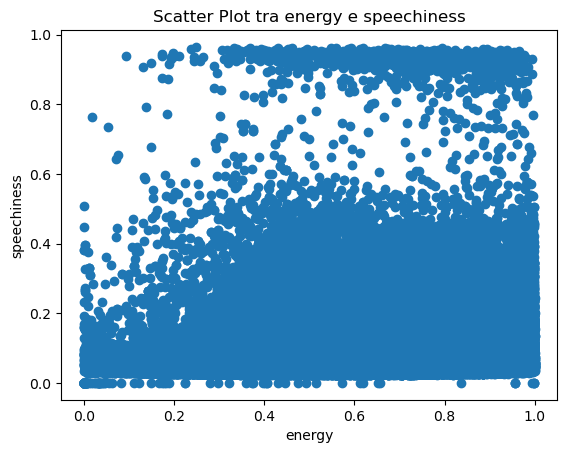

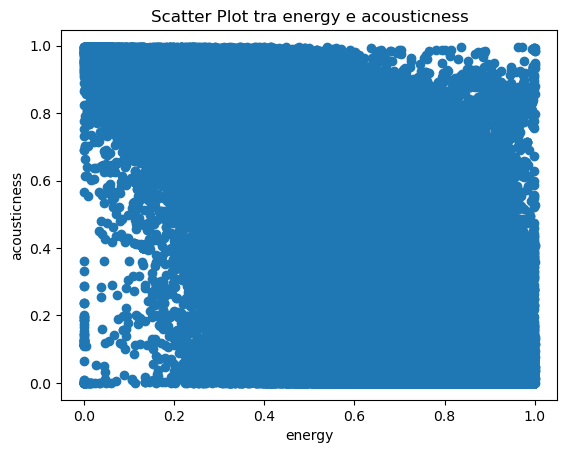

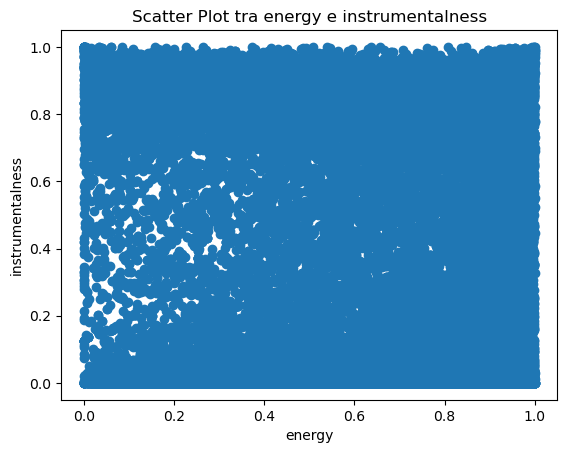

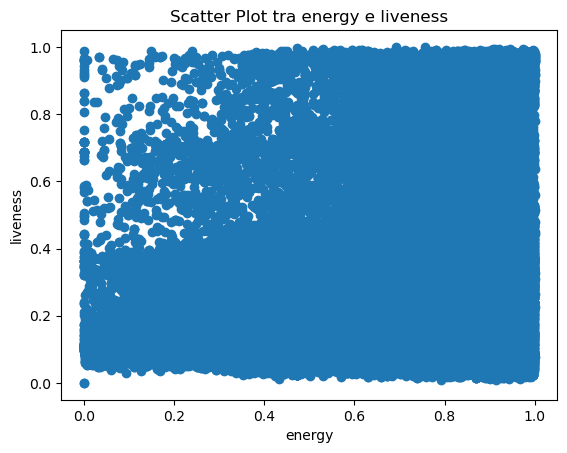

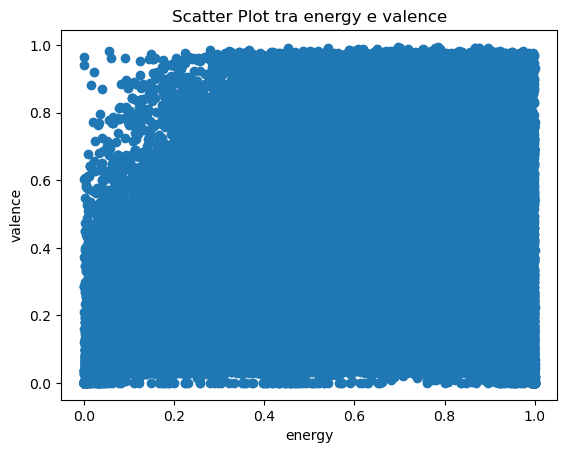

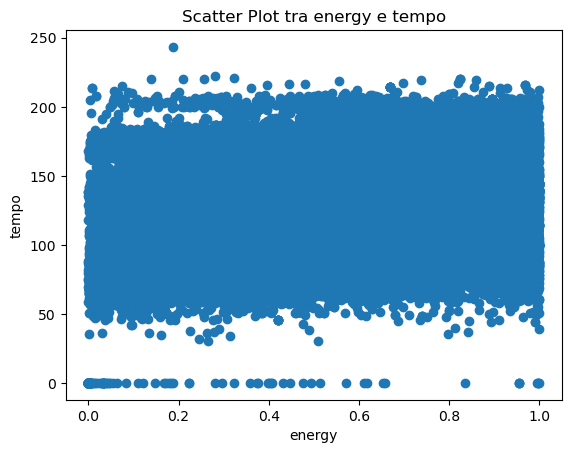

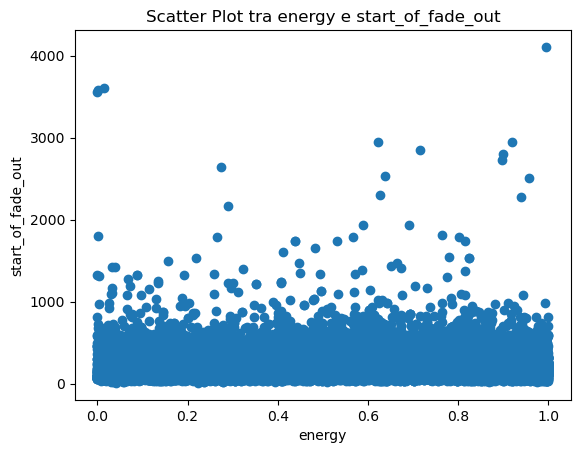

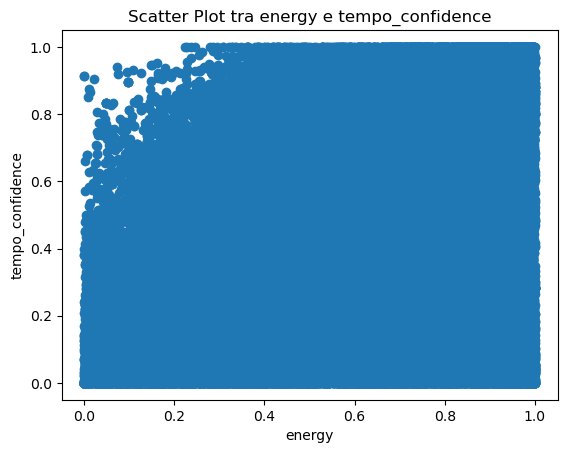

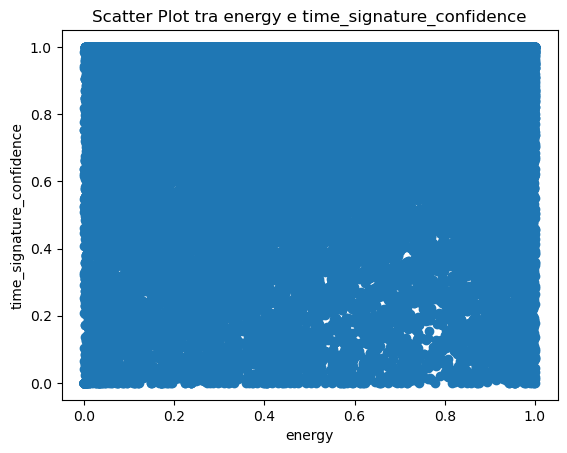

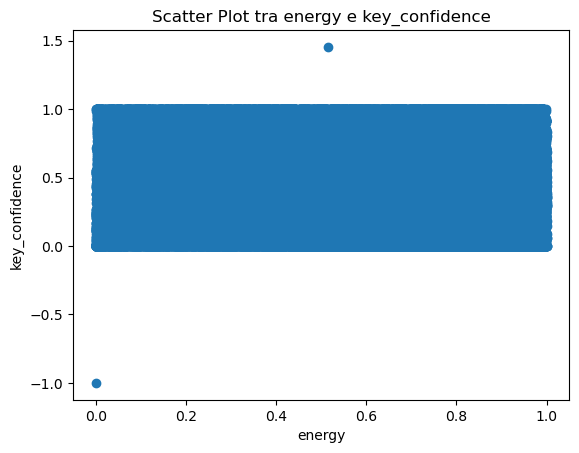

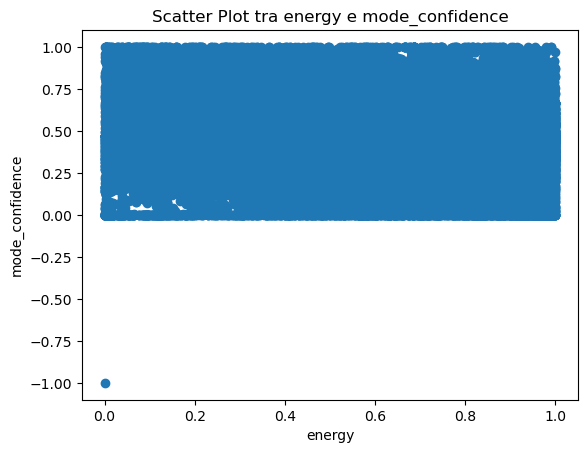

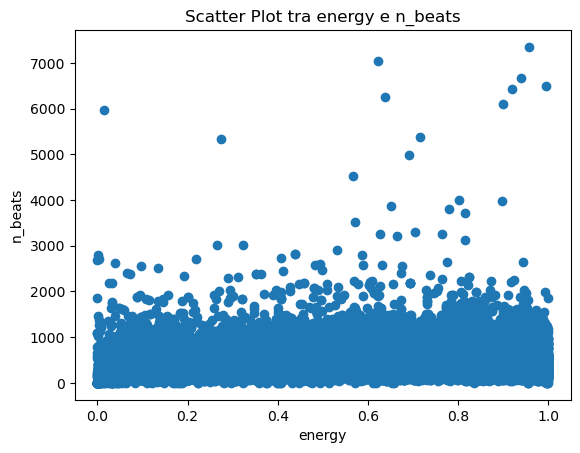

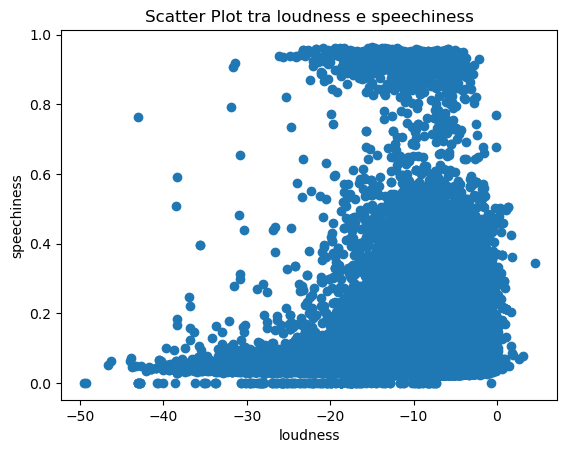

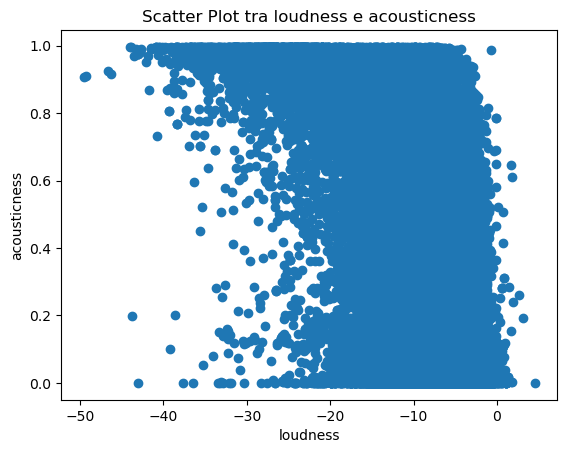

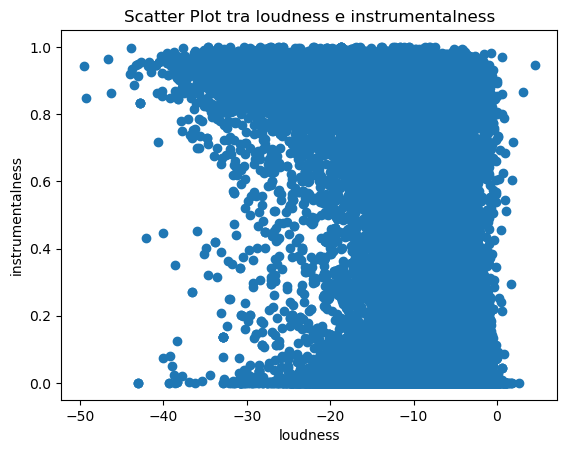

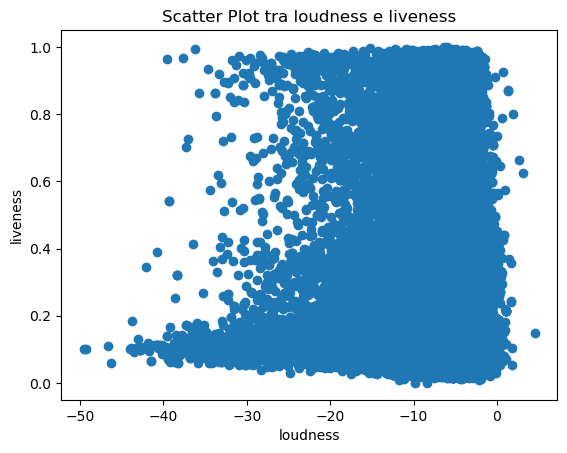

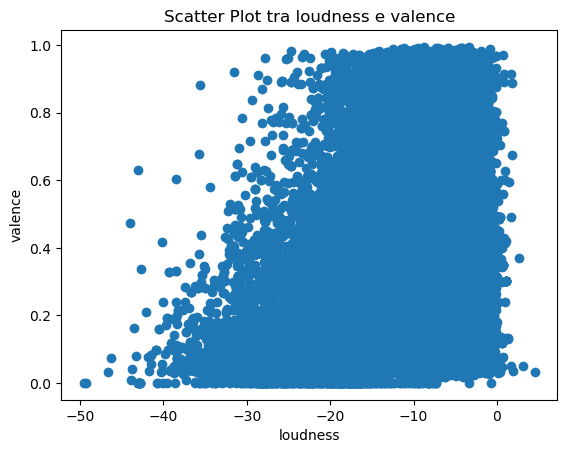

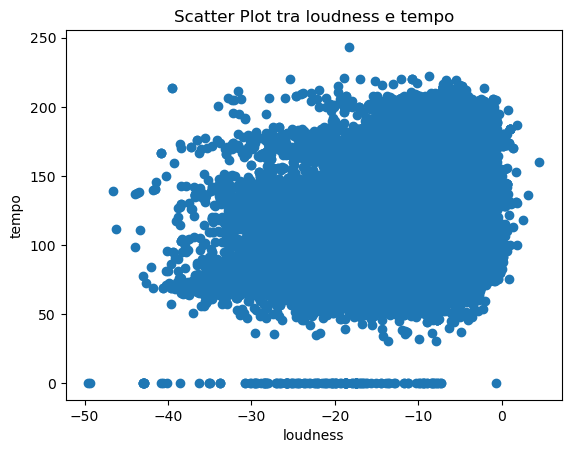

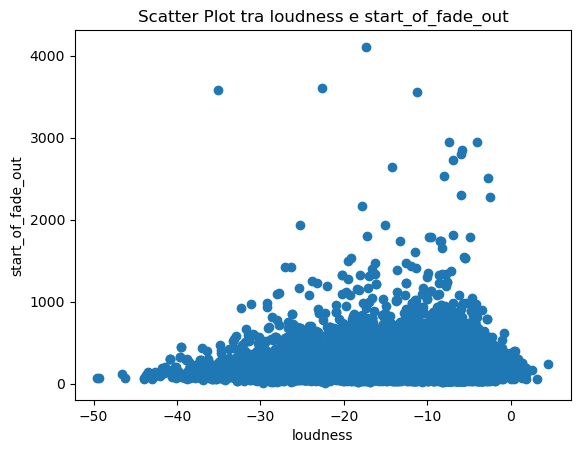

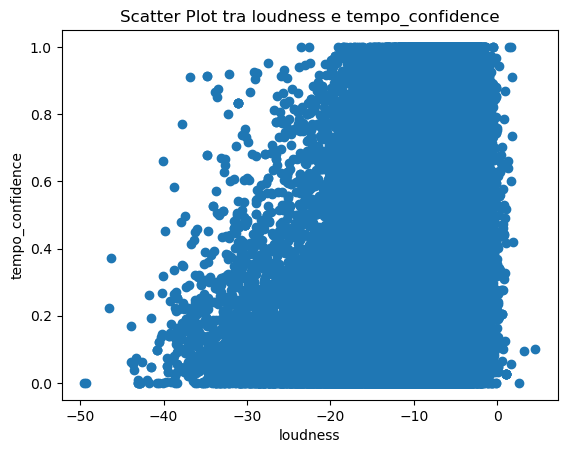

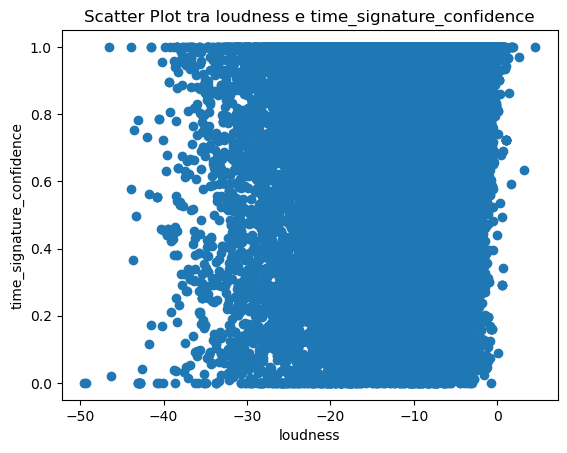

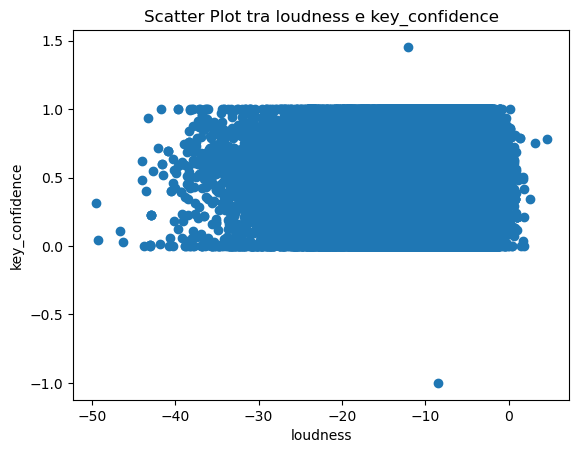

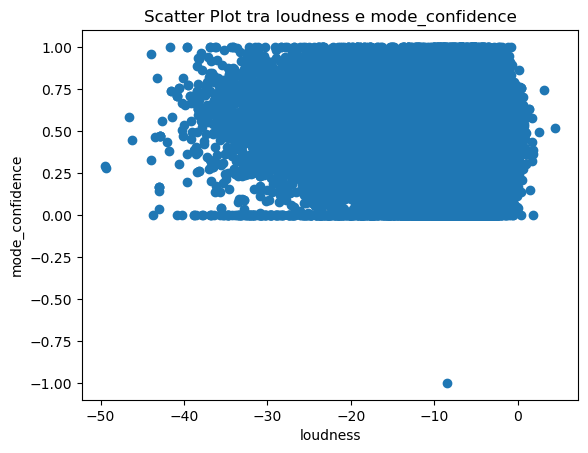

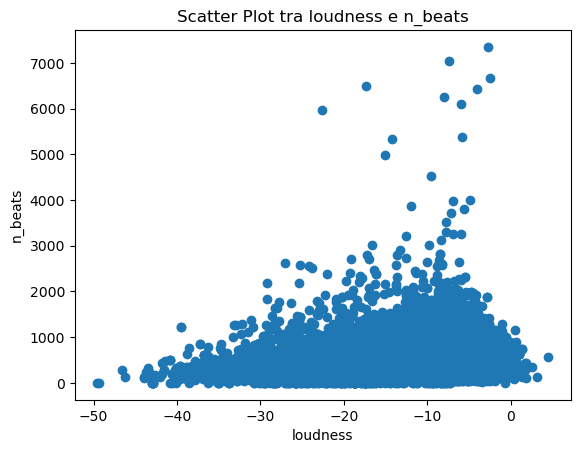

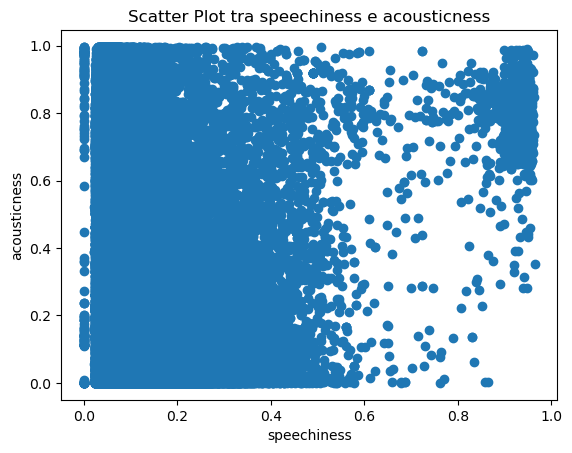

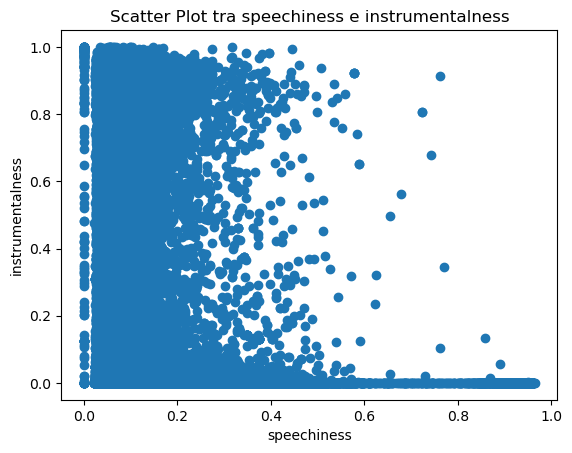

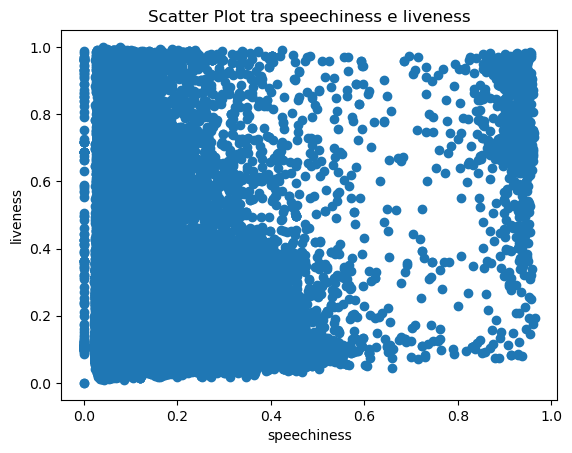

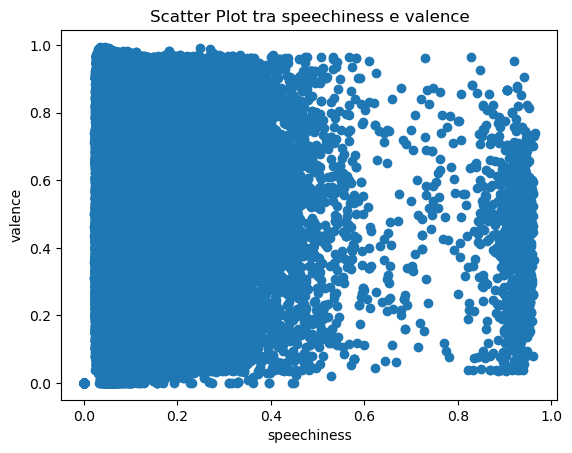

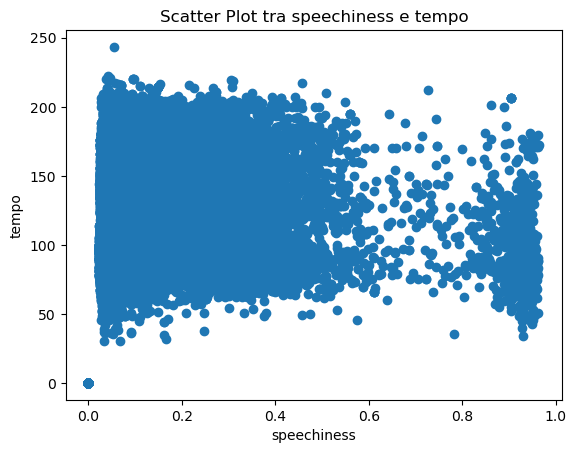

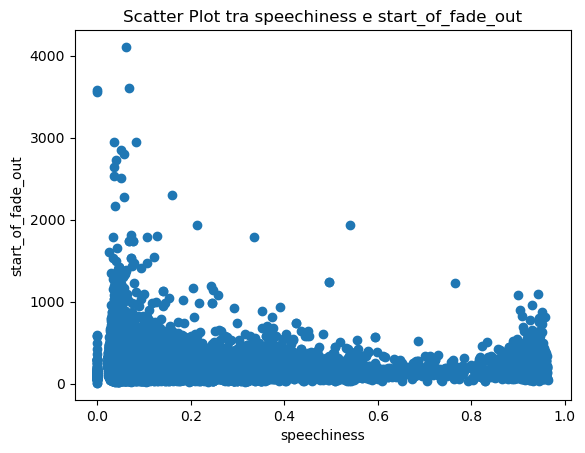

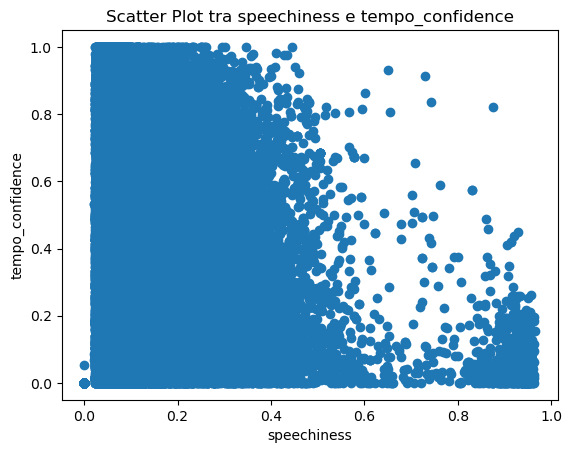

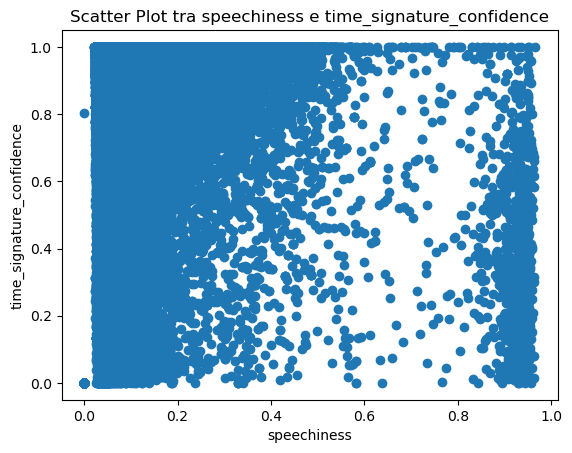

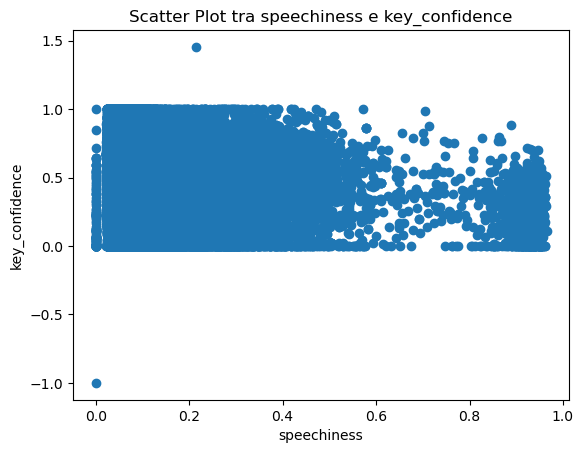

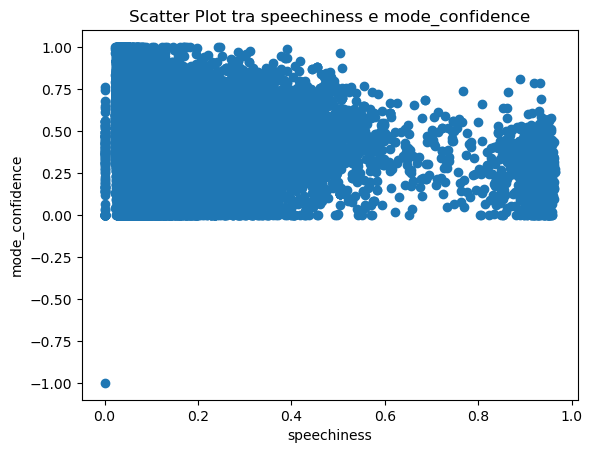

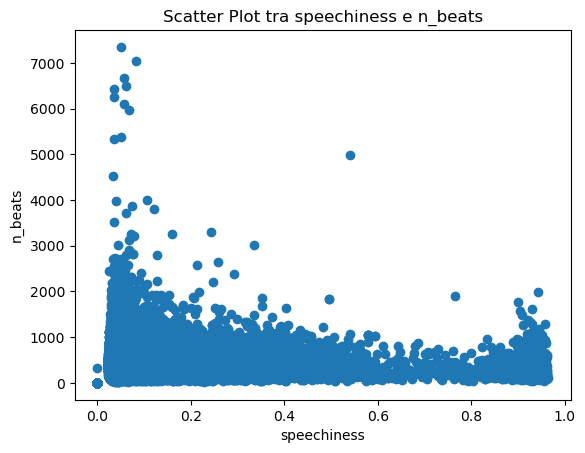

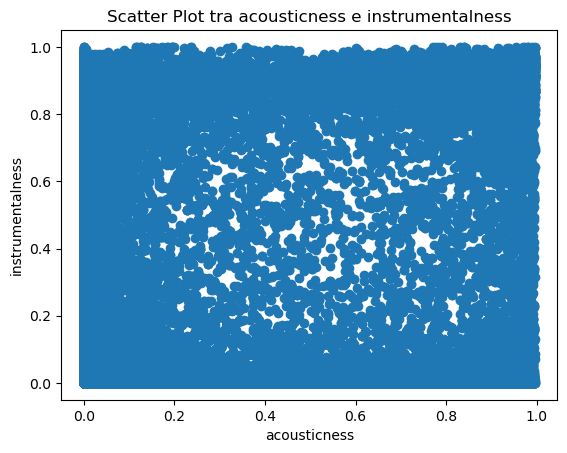

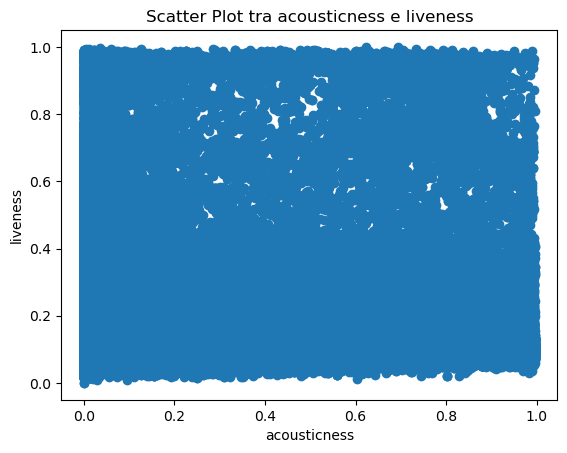

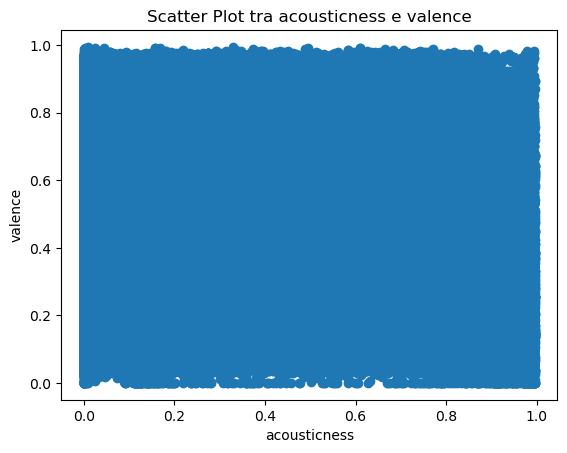

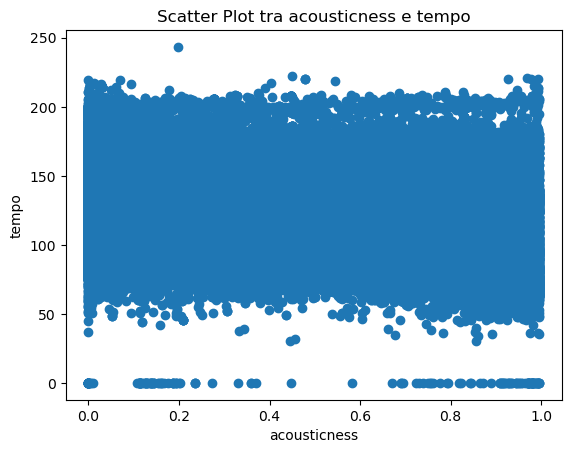

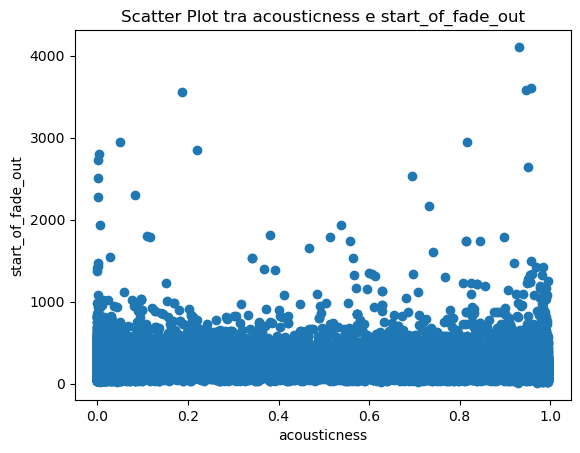

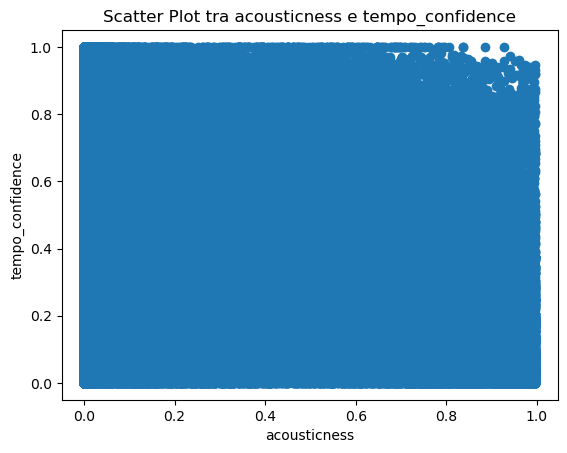

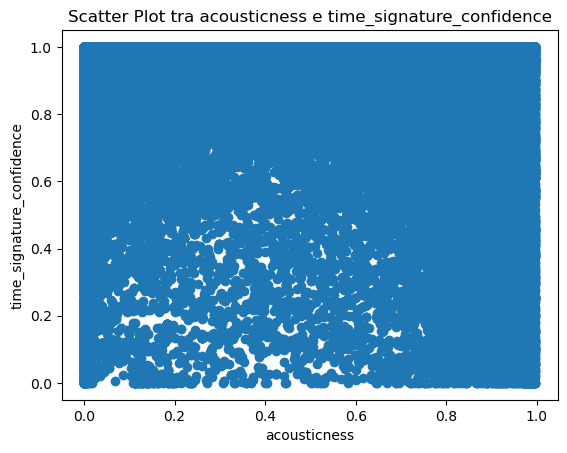

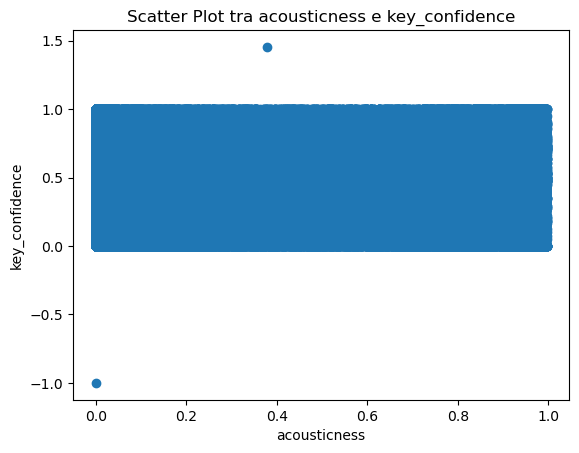

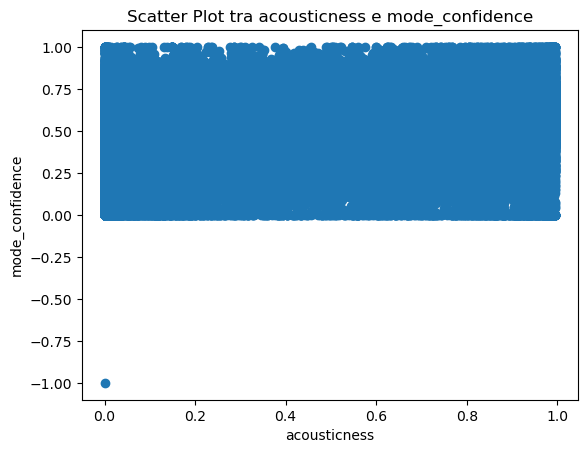

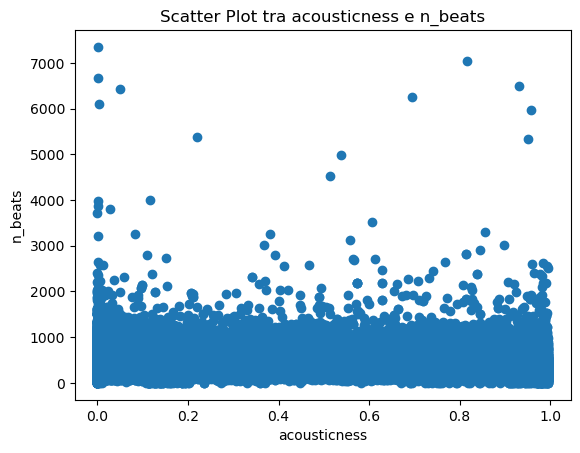

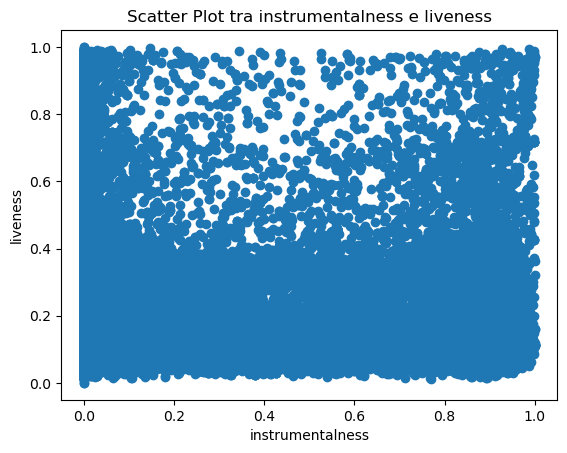

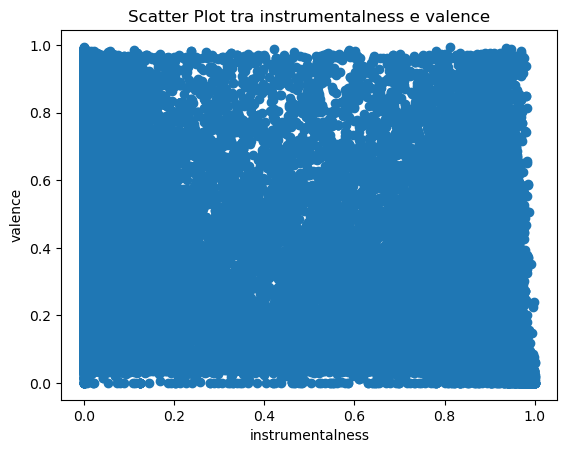

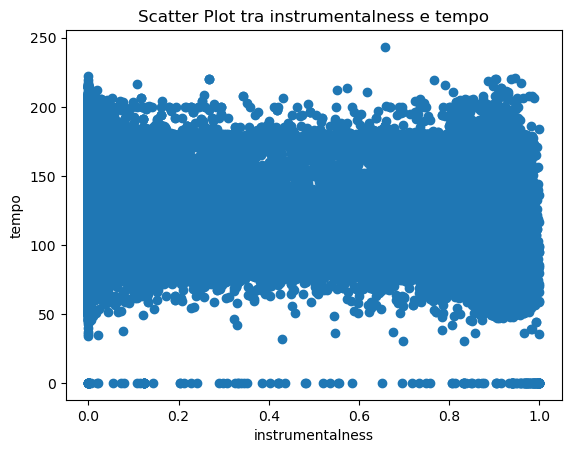

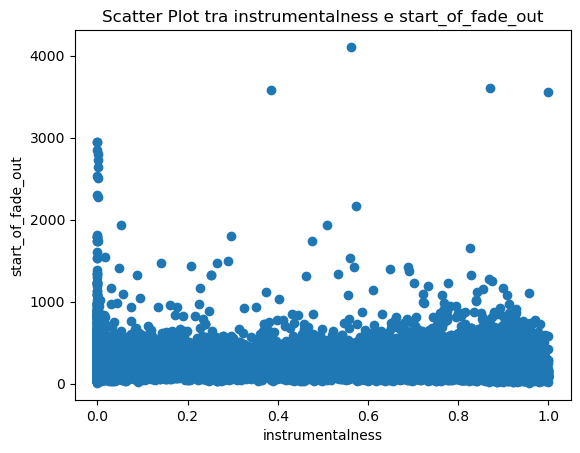

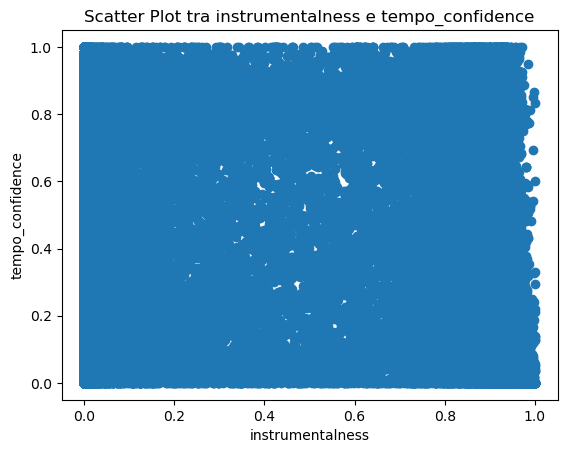

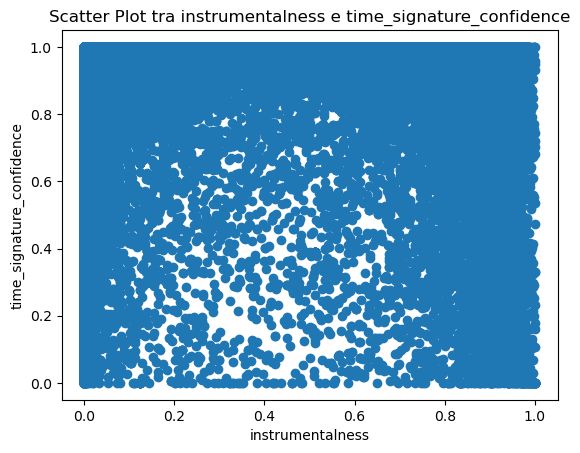

KeyboardInterrupt: 

In [14]:
# Definire le variabili da visualizzare
variabili_da_visualizzare = list(df_continui.columns)

# Creare scatter plot per ogni combinazione di variabili
numero_di_variabili = len(variabili_da_visualizzare)

for i in range(numero_di_variabili):
    for j in range(i+1, numero_di_variabili):
        # Creare il plot
        plt.scatter(df_continui[variabili_da_visualizzare[i]], df_continui[variabili_da_visualizzare[j]])
        
        # Aggiungere etichette agli assi
        plt.xlabel(variabili_da_visualizzare[i])
        plt.ylabel(variabili_da_visualizzare[j])
        
        # Aggiungere un titolo
        plt.title(f"Scatter Plot tra {variabili_da_visualizzare[i]} e {variabili_da_visualizzare[j]}")
        
        # Mostrare il plot
        plt.show()

## Heatmap

In [ ]:
chiavi=df_continui.keys()
for n in range(0, len(chiavi), 4):
    k=chiavi[n:(n+4)]
    sottodf=df_continui[k]
    sottodf.boxplot()
    plt.show()

##  Dataset sugli artisti

In [67]:
df_artist=pd.read_csv('tabular/artists.csv', skipinitialspace=True)

In [68]:
len(df_artist)

30141

In [69]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [70]:
prima_riga_id_tracks=df['id'].loc[0]

In [71]:
prima_riga_id_tracks

'4rjA5kJJWbwU1prXCvg6Fk'

In [72]:
prima_riga_id_tracks==df_artist[['id']] # non c'è alcun tipo di corrispondenza

id
0      False
1      False
2      False
3      False
4      False
...      ...
30136  False
30137  False
30138  False
30139  False
30140  False

[30141 rows x 1 columns]

In [73]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... valence    tempo  time_signature  \
0                                 1989  ...  0.2390  186.001               3   
1                              Kiasmos  ...  0.1450  120.016               4   
2                        Night Visions  ...  0.3200  118.052               3   
3                   Confronted Remixes  ...  0.0374  128.990               4   
4                    10 Years Diynamic  ...  0.1190  120.003               4   
...                                ...  ...     ...      ...             ...   
109542  I'm Good (Blue) [REAPER Remix]  ...  0.3700  173.958               4   
109543                End Of The Night  ...  0.3120   99.970               4   
109544                   One More Love  ...  0.8010  130.011               4   
109545                        Savannah  ...  0.3870  108.074               4   
109546                  Champagne Talk  ...  0.5630   92.078               4   

        start_of_fade_out  tempo_confidence  time_signature_confidence  \
0               275.90530             0.020                      1.000   
1               517.28253             0.678                      0.326   
2               259.04180             0.847                      0.457   
3               387.41360             0.882                      0.498   
4               239.63574             0.882                      1.000   
...                   ...               ...                        ...   
109542          200.10376             0.729                      1.000   
109543      

## Nuovo dataset

In [74]:
df_artist['genres']=df_artist['genres'].values 

In [75]:
df_artist['genres']=df_artist['genres'].replace('[]','') # trasformazione delle parentesi vuote, in spazio

In [76]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                     
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                     

[30141 rows x 5 columns]

In [77]:
df_artist['genres']=df_artist['genres'].dropna() #eliminazione degli artisti che non appartengono a nessu genere 

In [78]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                     
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                     

[30141 rows x 5 columns]

In [79]:
df_artist['popularity'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
30136    False
30137    False
30138    False
30139    False
30140    False
Name: popularity, Length: 30141, dtype: bool

## Creazione dizionario artisti

In [80]:
df_pop=df_artist[['name', 'popularity']] #colonne che riguardano il nome dell'artista e la popolarità

In [81]:
df[['artists']]

artists
0                               Kölsch
1                              Kiasmos
2                      Joris Delacroix
3               Pan-Pot;Anfisa Letyago
4                Kollektiv Turmstrasse
...                                ...
109542  David Guetta;Bebe Rexha;REAPER
109543                     Danny Avila
109544               David Guetta;Akon
109545              Diviners;Philly K.
109546                            King

[109149 rows x 1 columns]

In [82]:
righe_selezionate = df_pop[df_pop['name'] == 'Tatiana']

# Stampa le righe selezionate
print(righe_selezionate)

        name  popularity
143  Tatiana        50.0
175  Tatiana        15.0


In [83]:
righe_selezionate = df_pop[df_pop['name'] == 'Fast Eddie']

# Stampa le righe selezionate
print(righe_selezionate)

         name  popularity
0  Fast Eddie        28.0


In [84]:
df_pop

name  popularity
0                    Fast Eddie        28.0
1                    Joe Smooth        38.0
2      Farley "Jackmaster" Funk        21.0
3                       Jomanda        20.0
4                     Floorplan        37.0
...                         ...         ...
30136                     Hoang        49.0
30137              Robin Hustin        45.0
30138                TobiMorrow        44.0
30139                  Diviners        47.0
30140                 Philly K.        38.0

[30141 rows x 2 columns]

In [85]:
lista_artisti=df_pop['name'].to_list()

In [86]:
len(lista_artisti)

30141

In [87]:
len(list(set(lista_artisti)))

29918

In [88]:
lista_iniziale=df_artist[['name', 'popularity']].values.tolist()

In [89]:
lista_iniziale

[['Fast Eddie', 28.0],
 ['Joe Smooth', 38.0],
 ['Farley "Jackmaster" Funk', 21.0],
 ['Jomanda', 20.0],
 ['Floorplan', 37.0],
 ['J.M. Silk', 7.0],
 ['Sampson Butch Moore', 0.0],
 ['Steve "Silk" Hurley', 34.0],
 ['Cosmic Gate', 51.0],
 ['Cajmere', 41.0],
 ['Dajae', 40.0],
 ['Marshall Jefferson', 50.0],
 ['George Smeddles', 38.0],
 ['Paris Brightledge', 24.0],
 ['Robert Owens', 32.0],
 ['Phuture', 21.0],
 ['DJ Pierre', 27.0],
 ['Chic Loren', 23.0],
 ['DJ Sneak', 25.0],
 ['Jungle Wonz', 7.0],
 ['Jamie Jones', 54.0],
 ['Maurice Joshua', 23.0],
 ['M. Terrel', 1.0],
 ['Armando', 21.0],
 ['Paul Johnson', 43.0],
 ['Mr. Lee', 19.0],
 ['Sounfx', 0.0],
 ['Will Clarke', 45.0],
 ['Ten City', 32.0],
 ['Fingers Inc.', 19.0],
 ['Tripmastaz', 13.0],
 ['RareTwo Inc.', 3.0],
 ['Steve Poindexter', 15.0],
 ['Free Magic', 20.0],
 ['Noosa Heads', 15.0],
 ['Frits Wentink', 25.0],
 ['Big Saldo', 0.0],
 ['Chantay Savage', 27.0],
 ['Jesse Perez', 20.0],
 ['KE', 20.0],
 ['Demuir', 26.0],
 ['Roy Davis Jr.', 36.0],


In [90]:
for i in lista_iniziale:
    print(i[0])

Fast Eddie
Joe Smooth
Farley "Jackmaster" Funk
Jomanda
Floorplan
J.M. Silk
Sampson Butch Moore
Steve "Silk" Hurley
Cosmic Gate
Cajmere
Dajae
Marshall Jefferson
George Smeddles
Paris Brightledge
Robert Owens
Phuture
DJ Pierre
Chic Loren
DJ Sneak
Jungle Wonz
Jamie Jones
Maurice Joshua
M. Terrel
Armando
Paul Johnson
Mr. Lee
Sounfx
Will Clarke
Ten City
Fingers Inc.
Tripmastaz
RareTwo Inc.
Steve Poindexter
Free Magic
Noosa Heads
Frits Wentink
Big Saldo
Chantay Savage
Jesse Perez
KE
Demuir
Roy Davis Jr.
Umosia
Russoul
Pierre's Pfantasy Club
J.R.
Gettoblaster
Robert Armani
Mark Grant
Walter Phillips
Glenn Underground
Chez Damier
Ron Trent
Khruangbin
Kevin Saunderson
Lee Foss
Bernard Badie
Tapesh
Los Suruba
DJ.B
Groove Assassin
Sean Ray
Illyus & Barrientos
Mr. Fingers
DJ Spen
Thommy Davis
Riva Starr
Emanuel Satie
Jean-Luc Ponty
Patrick Topping
Zoe Thorn
Supernova
Chris Carrier
JEFFK
Nouha Matlouni
Angel Alanis
DJ Deeon
Joeski
Tyree
Jeziel Quintela
Jovonn
DJ Deep
Ralphi Rosario
Aneeta Beat
Lind

In [91]:
duplicati = []
singoli = []
conteggio_elementi = {}


for i in lista_iniziale:
    nome = i[0]

    # Aggiorna il conteggio per il nome corrente
    if nome in conteggio_elementi:
        conteggio_elementi[nome] += 1
    else:
        conteggio_elementi[nome] = 1

# Ora che abbiamo completato il conteggio, possiamo decidere quali sono singoli e duplicati
for elemento, conteggio in conteggio_elementi.items():
    if conteggio == 1:
        singoli.append(elemento)
    else:
        duplicati.append(elemento)



In [92]:
singoli

['Fast Eddie',
 'Joe Smooth',
 'Farley "Jackmaster" Funk',
 'Jomanda',
 'Floorplan',
 'J.M. Silk',
 'Sampson Butch Moore',
 'Steve "Silk" Hurley',
 'Cosmic Gate',
 'Cajmere',
 'Dajae',
 'Marshall Jefferson',
 'George Smeddles',
 'Paris Brightledge',
 'Robert Owens',
 'Phuture',
 'DJ Pierre',
 'Chic Loren',
 'DJ Sneak',
 'Jungle Wonz',
 'Jamie Jones',
 'Maurice Joshua',
 'M. Terrel',
 'Armando',
 'Paul Johnson',
 'Mr. Lee',
 'Sounfx',
 'Will Clarke',
 'Ten City',
 'Fingers Inc.',
 'Tripmastaz',
 'RareTwo Inc.',
 'Steve Poindexter',
 'Free Magic',
 'Noosa Heads',
 'Frits Wentink',
 'Big Saldo',
 'Chantay Savage',
 'Jesse Perez',
 'KE',
 'Demuir',
 'Roy Davis Jr.',
 'Umosia',
 'Russoul',
 "Pierre's Pfantasy Club",
 'J.R.',
 'Gettoblaster',
 'Robert Armani',
 'Mark Grant',
 'Walter Phillips',
 'Glenn Underground',
 'Chez Damier',
 'Ron Trent',
 'Khruangbin',
 'Kevin Saunderson',
 'Lee Foss',
 'Bernard Badie',
 'Tapesh',
 'Los Suruba',
 'DJ.B',
 'Groove Assassin',
 'Sean Ray',
 'Illyus & Ba

In [93]:
duplicati

['Tatiana',
 'Sasha',
 'Wheels on the Bus',
 'Hush Little Baby',
 'Shiloh Dynasty',
 'Beowülf',
 'Chris James',
 'Janine',
 'Rahat Fateh Ali Khan',
 'Rocco',
 'Ebony',
 'Brandon',
 'Liniker',
 'Malibu',
 'Pyt Ny',
 'David Thomas',
 'Ian Dean',
 'Mango',
 'Péricles',
 'Tiee',
 'Gaab',
 'Michelle',
 'Carolina',
 'Frenzy',
 'Buddy',
 'Quetschn Academy',
 'Hannes',
 'Xandl',
 'Mr. C',
 'Sheba',
 'S. P. Sailaja',
 'KK',
 'Grey Skye Evans',
 'Heart',
 'Tristan',
 'Level',
 'Marley Carroll',
 'Plan B',
 'Divino',
 'Haze',
 'Randy',
 'MOSKA',
 'Fran C',
 'Juanka',
 'ThirumaLi',
 'SA',
 'MC Couper',
 'Teejay',
 'Kalla Sha',
 'Sayanora Philip',
 'MK',
 'Fran',
 'Ana Gabriela',
 'Otto',
 'Maze',
 'Netto',
 'Baby Sleep Sounds',
 'Meeresrauschen',
 'White Noise Baby Sleep',
 'Sleepy Times',
 'The Rain Library',
 'Nature Recordings',
 'Romy',
 'Soraya',
 'Dante',
 'Rosana',
 'Dorian',
 'Smartface',
 'Nostalgique',
 'King',
 'Medina',
 'Romy Wave',
 'Carola',
 'IMAN',
 'ABC',
 'Mirage',
 'Howard Jone

In [94]:
import numpy as np
dizionario_artisti={}
for d in singoli:
    for index, element  in enumerate(lista_iniziale):
        if d in element:
            dizionario_artisti[d]=element[1]

for g in duplicati:
    lista_doppi=[]
    for index, element in enumerate(lista_iniziale):
        if g in element:
            lista_doppi.append(element[1])
            dizionario_artisti[g]=round(np.mean(lista_doppi), 2)

      
            
    
    

In [95]:
dizionario_artisti

{'Fast Eddie': 28.0,
 'Joe Smooth': 38.0,
 'Farley "Jackmaster" Funk': 21.0,
 'Jomanda': 20.0,
 'Floorplan': 37.0,
 'J.M. Silk': 7.0,
 'Sampson Butch Moore': 0.0,
 'Steve "Silk" Hurley': 34.0,
 'Cosmic Gate': 51.0,
 'Cajmere': 41.0,
 'Dajae': 40.0,
 'Marshall Jefferson': 50.0,
 'George Smeddles': 38.0,
 'Paris Brightledge': 24.0,
 'Robert Owens': 32.0,
 'Phuture': 21.0,
 'DJ Pierre': 27.0,
 'Chic Loren': 23.0,
 'DJ Sneak': 25.0,
 'Jungle Wonz': 7.0,
 'Jamie Jones': 54.0,
 'Maurice Joshua': 23.0,
 'M. Terrel': 1.0,
 'Armando': 21.0,
 'Paul Johnson': 43.0,
 'Mr. Lee': 19.0,
 'Sounfx': 0.0,
 'Will Clarke': 45.0,
 'Ten City': 32.0,
 'Fingers Inc.': 19.0,
 'Tripmastaz': 13.0,
 'RareTwo Inc.': 3.0,
 'Steve Poindexter': 15.0,
 'Free Magic': 20.0,
 'Noosa Heads': 15.0,
 'Frits Wentink': 25.0,
 'Big Saldo': 0.0,
 'Chantay Savage': 27.0,
 'Jesse Perez': 20.0,
 'KE': 20.0,
 'Demuir': 26.0,
 'Roy Davis Jr.': 36.0,
 'Umosia': 0.0,
 'Russoul': 14.0,
 "Pierre's Pfantasy Club": 9.0,
 'J.R.': 6.0,
 'Ge

In [96]:
dizionario_artisti['Matthias Reim'] #57

57.0

In [97]:
dizionario_artisti['BHZ']#64

64.0

In [98]:
dizionario_artisti['Lugatti & 9ine']#52

52.0

In [99]:
dizionario_artisti['Dj Kone & Marc Palacios']#27

27.0

In [113]:
righe_selezionate = df_pop[df_pop['name'] == 'Tatiana']

# Stampa le righe selezionate
print(righe_selezionate) #media 82

        name  popularity
143  Tatiana        50.0
175  Tatiana        15.0


In [101]:
righe_selezionate = df_pop[df_pop['name'] == 'Michelle']

# Stampa le righe selezionate
print(righe_selezionate) # media 27

           name  popularity
3294   Michelle        52.0
28528  Michelle        22.0


##  INSERIMENTO NELLA TABELLA GENERICA

In [102]:
#df_copia=df.copy()

In [104]:
popularity_artist_column = []  # Create an empty list to store popularity_artist values

for index, row in df.iterrows():
    lista = []  # Reinizializza la lista all'inizio di ogni iterazione
    if ',' in row['artists']:
        artisti = row['artists'].split(',')
        for i in artisti:
            if i in dizionario_artisti.keys():
                lista.append(dizionario_artisti[i])
    elif ';' in row['artists']:
        artisti = row['artists'].split(';')
        for i in artisti:
            if i in dizionario_artisti.keys():
                lista.append(dizionario_artisti[i])
    elif row['artists'] in dizionario_artisti.keys():
        lista = [dizionario_artisti[row['artists']]]
    else:
        print('vuoto', row['artists'])

    popularity_artist_column.append(lista)  

df['popularity_artist'] = popularity_artist_column 


vuoto Vickeblanka
vuoto Vickeblanka
vuoto Vickeblanka
vuoto Vickeblanka
vuoto ReStarT
vuoto Patrick Brasca


In [105]:
df[['artists', 'popularity_artist']]

artists   popularity_artist
0                               Kölsch              [51.0]
1                              Kiasmos              [47.0]
2                      Joris Delacroix              [44.0]
3               Pan-Pot;Anfisa Letyago        [36.0, 40.0]
4                Kollektiv Turmstrasse              [45.0]
...                                ...                 ...
109542  David Guetta;Bebe Rexha;REAPER  [86.0, 79.0, 50.0]
109543                     Danny Avila              [47.0]
109544               David Guetta;Akon        [86.0, 79.0]
109545              Diviners;Philly K.        [47.0, 38.0]
109546                            King              [39.5]

[109149 rows x 2 columns]

## Aggiunta colonna popolarità nelle tracks

In [107]:
df[['artists', 'popularity_artist']]

artists   popularity_artist
0                               Kölsch              [51.0]
1                              Kiasmos              [47.0]
2                      Joris Delacroix              [44.0]
3               Pan-Pot;Anfisa Letyago        [36.0, 40.0]
4                Kollektiv Turmstrasse              [45.0]
...                                ...                 ...
109542  David Guetta;Bebe Rexha;REAPER  [86.0, 79.0, 50.0]
109543                     Danny Avila              [47.0]
109544               David Guetta;Akon        [86.0, 79.0]
109545              Diviners;Philly K.        [47.0, 38.0]
109546                            King              [39.5]

[109149 rows x 2 columns]

In [112]:
df[df['artists']=='Tatiana']

id                     name  disc_number  \
90267  4h4ZWguApMLFd44vJ6az4E             Jingle Bells            1   
90269  6h5vhCtXMxAZeV7GiwKoX2            Vamos A Jugar            1   
90270  4l9GmtSbgenAGPwiXKZvph             Jingle Bells            1   
90272  6GKPOc1LLYP7xggLMpwceW  Susanita Tiene Un Ratón            1   
90274  2HijAY1d9jh9QNpZcGN4m8      Un Lobo En La Noche            1   
90276  1hBUclMHN7XC4b9rFmYLL0         Dale, Dale, Dale            1   
90421  7vXHdiKN17VSQuADgeufuZ        Leyes del Corazón            1   
90476  301Of3SAyoxq6qcaMvVp9d                  Pim Pom            1   
90477  75J8YeBIpQ2suMkbrp3vSl   Peligro En El Elevador            1   
90478  6DPfI0qPys4nScond86AT0         El Calentamiento            1   
90510  2k8NYRbbS7LoZf7KJJUOTF          Rodolfo el Reno            1   
90516  29ULf732Q7jh9wdrLO6gTu        Witzy Witzy Araña            1   
90618  15CLG3Q3AdBZZRYQUKYKqW     No Vuelvas A Besarme            1   
90623  06hfj260K16gNJePaOi5qq          Pollito Chicken            1   
90624  2AMXN7aIur89kqh8q8xR9N             Jingle Bells            1   
90762  438KuLC5HQSYXj2kproGYt           Una Rata Vieja            1   
90776  4Uz8hHidrir0u1yjvqPg5O    A la Vibora de la Mar            1   
90872  6Hiy6GXkTsVDRUHmn2dBUj        Me Voy A Enamorar            1   
90874  3b8874ADJrQZlhdKH5pV86          Lindo Pescadito            1   
91017  1r654w7vrvWukKwzjZ8iGL               Estrellita            1   

       duration_ms  explicit  popularity  track_number  artists   album_type  \
90267       180346     False           0            20  Tatiana  compilation   
90269       181600     False           0             1  Tatiana  compilation   
90270       180346     False           0            18  Tatiana  compilation   
90272       157933     False           0             9  Tatiana  compilation   
90274       186746     False           0            15  Tatiana  compilation   
90276       200453     False          40             8  Tatiana        album   
90421       223946     False          42             1  Tatiana        album   
90476       224853     False          34             9  Tatiana        album   
90477       160880     False          36             1  Tatiana        album   
90478       236026     False          35             2  Tatiana        album   
90510       182773     False          33             8  Tatiana        album   
90516       212977     False          33             7  Tatiana        album   
90618       261320     False          37             1  Tatiana        album   
90623       235181     False          33             5  Tatiana        album   
90624       180346     False          28             1  Tatiana  compilation   
90762       228240     False          33             7  Tatiana        album   
90776       208493     False          32             6  Tatiana        album   
90872       191066     False          33            11  Tatiana        album   
90874       185360     False          33             3  Tatiana        album   
91017       236226     False          30             1  Tatiana        album   

                                              album_name  ...    tempo  \
90267                                Ya huele a buñuelos  ...  104.493   
90269                          Diversión para los peques  ...  168.355   
90270  La navidad es todo aquello que nos hace record...  ...  104.493   
90272                          Diversión para los peques  ...  136.041   
90274                          Halloween 2022 Pop Vol. 2  ...  129.634   
90276                                           ¡Brinca!  ...  129.723   
90421                                  Leyes Del Corazón  ...  136.245   
90476                                           ¡Brinca!  ...  121.739   
90477                             Peligro En El Elevador  ...  115.634   
90478                                           ¡Brinca!  ...  109.706   
90510                                   

In [109]:
df.to_csv('nuovo_dataset_totale.csv')